In [1]:
import pandas as pd

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df=df_train.copy()

In [4]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train=df_train.drop(["PassengerId","Name","Cabin","Ticket"],axis=1)

In [8]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [9]:
df_train.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'], dtype=object)

# Capture facts about survived column

In [10]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
#Survived and not survived at gender level
pd.crosstab(df_train['Sex'],df_train['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [12]:
pd.crosstab(df_train['Pclass'],df_train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [13]:
women=df_train[df_train['Sex']=='female']

In [14]:
womensur=women[women['Survived']==1]
womennotsur=women[women['Survived']==0]

In [15]:
womensur

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
...,...,...,...,...,...,...,...,...
874,1,2,female,28.0,1,0,24.0000,C
875,1,3,female,15.0,0,0,7.2250,C
879,1,1,female,56.0,0,1,83.1583,C
880,1,2,female,25.0,0,1,26.0000,S


In [16]:
womennotsur

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
14,0,3,female,14.0,0,0,7.8542,S
18,0,3,female,31.0,1,0,18.0000,S
24,0,3,female,8.0,3,1,21.0750,S
38,0,3,female,18.0,2,0,18.0000,S
40,0,3,female,40.0,1,0,9.4750,S
...,...,...,...,...,...,...,...,...
854,0,2,female,44.0,1,0,26.0000,S
863,0,3,female,NaN,8,2,69.5500,S
882,0,3,female,22.0,0,0,10.5167,S
885,0,3,female,39.0,0,5,29.1250,Q


In [17]:
men=df_train[df_train['Sex']=='male']
mensur=men[men['Survived']==1]
mennotsur=men[men['Survived']==0]

In [18]:
men

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S
884,0,3,male,25.0,0,0,7.0500,S
886,0,2,male,27.0,0,0,13.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [19]:
mensur

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
17,1,2,male,NaN,0,0,13.0000,S
21,1,2,male,34.0,0,0,13.0000,S
23,1,1,male,28.0,0,0,35.5000,S
36,1,3,male,NaN,0,0,7.2292,C
55,1,1,male,NaN,0,0,35.5000,S
...,...,...,...,...,...,...,...,...
838,1,3,male,32.0,0,0,56.4958,S
839,1,1,male,NaN,0,0,29.7000,C
857,1,1,male,51.0,0,0,26.5500,S
869,1,3,male,4.0,1,1,11.1333,S


In [20]:
mennotsur

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
...,...,...,...,...,...,...,...,...
881,0,3,male,33.0,0,0,7.8958,S
883,0,2,male,28.0,0,0,10.5000,S
884,0,3,male,25.0,0,0,7.0500,S
886,0,2,male,27.0,0,0,13.0000,S


Histogram

/tmp/ipykernel_7418/4078408592.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(womensur['Age'],bins=15,label='women survived')


<AxesSubplot: xlabel='Age', ylabel='Density'>

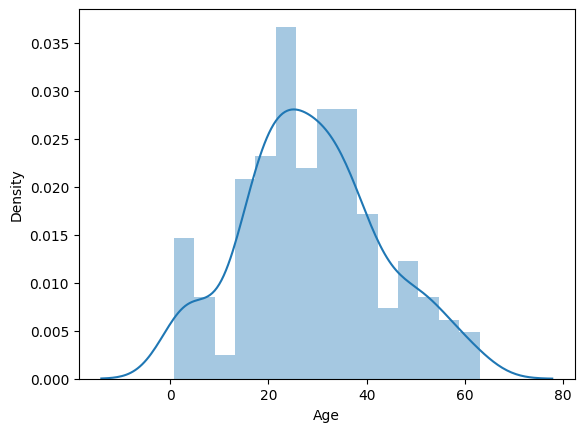

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(womensur['Age'],bins=15,label='women survived')
#plt.legend()

/tmp/ipykernel_7418/2315183411.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(womensur['Age'],bins=5,label='women survived',kde=False)
/tmp/ipykernel_7418/2315183411.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(womennotsur['Age'],bins=5,label='women not survived',kde=False)


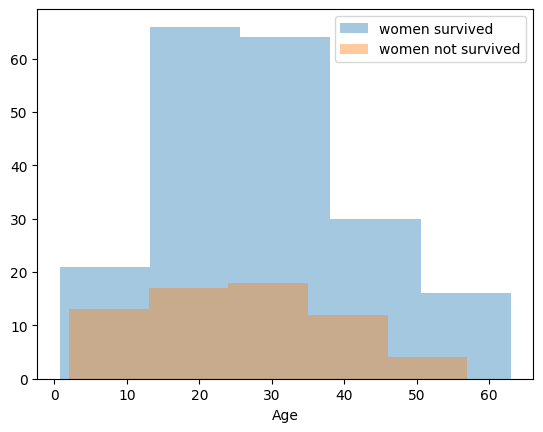

In [22]:
sns.distplot(womensur['Age'],bins=5,label='women survived',kde=False)
sns.distplot(womennotsur['Age'],bins=5,label='women not survived',kde=False)
plt.legend()

/tmp/ipykernel_7418/1416317235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mensur['Age'],bins=5,label='men survived',kde=False)
/tmp/ipykernel_7418/1416317235.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mennotsur['Age'],bins=5,label='men not survived',kde=False)


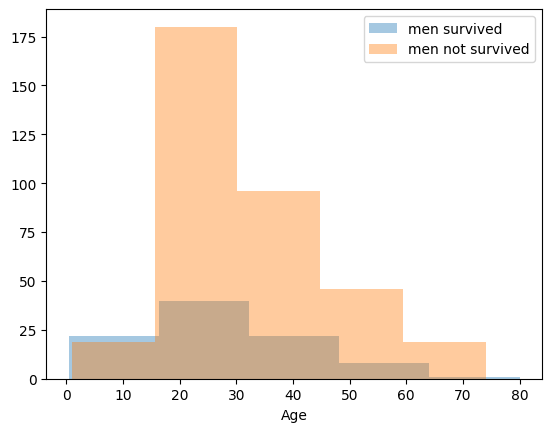

In [23]:
sns.distplot(mensur['Age'],bins=5,label='men survived',kde=False)
sns.distplot(mennotsur['Age'],bins=5,label='men not survived',kde=False)
plt.legend()

In [24]:
# Histogram affected by bins
#Kde not affected by bins
#To find distribution of continuous value, we go for histogram
#hist--X-axis:age,Y-axis=count
#Kde--X-axis:age,Y-axis=probability

# Feature Engineering

In [25]:
#Finding missing value and replace it
#column value must be numeric not string inorder to build model

Visualizing null values


<AxesSubplot: >

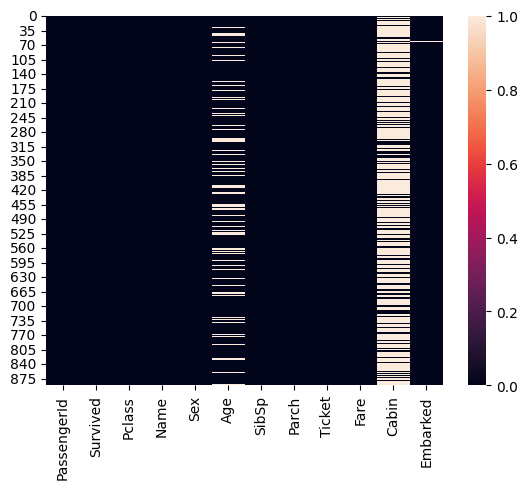

In [26]:
sns.heatmap(df.isnull())

In [27]:
#Handling missing values
#As cabin has many missing values, we need to drop it.
df.drop(['Cabin'],axis=1,inplace=True)

In [28]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [30]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [31]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
#df['Embarked'].fillna(df['Embarked'].value_counts().index.max(),inplace=True)

In [33]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [34]:
print(df['Age'].mean())
print(df['Age'].median())
print(df['Age'].mode())

29.69911764705882
28.0
0    24.0
Name: Age, dtype: float64


In [35]:
import numpy as np
np.random.randint(1,100,177).mean()

53.48022598870057

In [36]:
mean=df['Age'].mean()

In [37]:
std=df['Age'].std()

In [38]:
lowage=mean-std
lowage

15.172620314724778

In [39]:
highage=mean+std
highage

44.22561497939286

In [40]:
val=np.random.randint(lowage,highage,177)

In [41]:
age_copy=df['Age'].copy()

In [42]:
type(age_copy)

pandas.core.series.Series

In [43]:
#Replacing null values
age_copy[np.isnan(age_copy)]=val

In [44]:
age_copy.isnull().sum()

0

In [45]:
df['Age']=age_copy

In [46]:
df['Age'].isnull().sum()

0

In [47]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

# Variable Transformation

In [48]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,33.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [49]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [50]:
#Using map function of pandas we can replace gender categorical values


In [51]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [52]:
df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [53]:
#Encoding techniques: one way is pandas get_dummies method and second way is sklearn's one hot encoding technique.
boarding_point=pd.get_dummies(df['Embarked'],drop_first=True)

In [54]:
boarding_point

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [55]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,33.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C


In [56]:
df.drop(['Name','Ticket','PassengerId','Embarked'],axis=1,inplace=True)

In [57]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,33.0,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


In [58]:
df_new=pd.concat([df,boarding_point],axis=1)

In [59]:
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,1
887,1,1,1,19.0,0,0,30.0000,0,1
888,0,3,1,33.0,1,2,23.4500,0,1
889,1,1,0,26.0,0,0,30.0000,0,0


# Model building

In [61]:
X=df_new.drop(['Survived'],axis=1)

In [62]:
y=df_new['Survived']

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [64]:
model=LogisticRegression(max_iter=500)

In [65]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [66]:
predicted_result=model.predict(X_test)

In [67]:
predicted_result

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [70]:
#accuracy_score=tp+tn/tp+tn+fp+fn
accuracy_score(y_test,predicted_result)

0.8134328358208955

In [71]:
confusion_matrix(y_test,predicted_result)

array([[136,  21],
       [ 29,  82]])

    predict   original
tp 136: survived:survived
tn 82: survived: not survived
fp 21: not survived: survived
fn 29: survived        : not survived

In [76]:
print(classification_report(y_test,predicted_result))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.80      0.74      0.77       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.81      0.81      0.81       268



In [77]:
y_test.value_counts()

0    157
1    111
Name: Survived, dtype: int64

In [86]:
print('0',(predicted_result==0).sum())
print('1',(predicted_result==1).sum())


0 165
1 103


# Prediction for Jack

In [89]:
X_test.iloc[0]

Pclass     3.0000
Sex        0.0000
Age       39.0000
SibSp      1.0000
Parch      1.0000
Fare      15.2458
Q          0.0000
S          0.0000
Name: 709, dtype: float64

In [96]:
jack=[[2,0,22,0,0,73.5000,0,1]]
model.predict(jack)

/home/nithya/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [94]:
df.groupby('Pclass')['Fare'].max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

# Prediction for Rose

In [98]:
rose=[[1,1,20,1,1,512.3292,0,1]]
model.predict(rose)

/home/nithya/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])